In [ ]:
# Project name

In [1]:
print("project name: HR Analytics JanataHack")

project name: HR Analytics JanataHack


In [ ]:
# A brief about problem statement

In [ ]:
'''
A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment
(data science only) as well. 
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who 
are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are 
really looking for a new employment. They have student information related to demographics, education, experience and features
related to training as well.
 
To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the 
current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.
'''

In [ ]:
# Importing required libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

In [ ]:
# Loading train and test dataset

In [40]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
# Lets have a look at few rows from training dataset

In [3]:
train.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [ ]:
# A few rows from bottom

In [4]:
train.tail(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,41,0
18358,5995,city_105,0.794,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,2,84,0


In [ ]:
# A few rows selected randomly

In [5]:
train.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
16616,13925,city_103,0.92,Male,Has relevent experience,no_enrollment,Phd,STEM,9,100-500,Funded Startup,1,79,0
14023,14491,city_144,0.84,Male,Has relevent experience,no_enrollment,High School,NaN,13,50-99,Funded Startup,1,36,0
15199,25577,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,Other,5,1000-4999,Pvt Ltd,1,54,0
14107,26773,city_16,0.91,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,>4,135,0
11153,3927,city_16,0.91,Male,Has relevent experience,no_enrollment,Masters,Business Degree,>20,10000+,Pvt Ltd,2,48,0


In [ ]:
# basic stats value 

In [6]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [ ]:
# shape of dataset

In [7]:
print("shape of training dataset:",train.shape)
print("shape of test dataset:",test.shape)

shape of training dataset: (18359, 14)
shape of test dataset: (15021, 13)


In [ ]:
# Detailed summary of training dataset

In [10]:
pd.DataFrame({"Total missing":train.isna().sum(),"% missing":train.isna().mean(),"DataType":train.dtypes,"Unique":train.nunique()})

,Total missing,% missing,DataType,Unique
enrollee_id,0,0.000000,int64,18359
city,0,0.000000,object,123
city_development_index,0,0.000000,float64,93
gender,4098,0.223215,object,3
relevent_experience,0,0.000000,object,2
enrolled_university,342,0.018628,object,3
education_level,457,0.024892,object,5
major_discipline,2838,0.154584,object,6
experience,59,0.003214,object,22
company_size,4779,0.260308,object,8


In [ ]:
# Lets see a few rows from test dataset

In [9]:
test.sample(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
5989,7505,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,16,<10,Pvt Ltd,>4,44
9315,1395,city_173,0.878,Male,No relevent experience,no_enrollment,Primary School,NaN,8,NaN,NaN,never,170
8089,20951,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,178


In [ ]:
# Detailed summary of test dataset

In [11]:
pd.DataFrame({"Total missing":test.isna().sum(),"% missing":test.isna().mean(),"DataType":test.dtypes,"Unique":test.nunique()})

,Total missing,% missing,DataType,Unique
enrollee_id,0,0.000000,int64,15021
city,0,0.000000,object,123
city_development_index,0,0.000000,float64,93
gender,3388,0.225551,object,3
relevent_experience,0,0.000000,object,2
enrolled_university,279,0.018574,object,3
education_level,395,0.026297,object,5
major_discipline,2393,0.159310,object,6
experience,44,0.002929,object,22
company_size,4051,0.269689,object,8


In [ ]:
# Listing all columns of training dataset

In [12]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [13]:
# Listing all columns of test dataset

In [14]:
test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [ ]:
# EDA

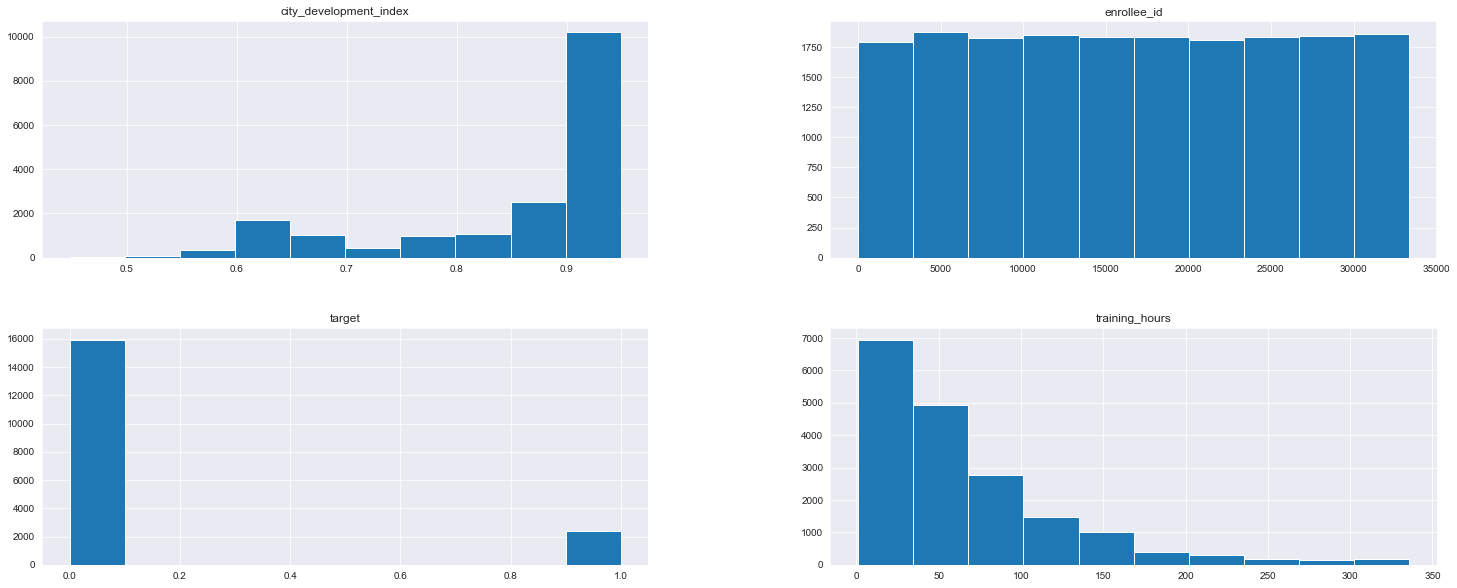

<Figure size 432x288 with 0 Axes>

In [19]:
train.hist(figsize=(25,10))
plt.show()
plt.savefig("hr-hist.png")

In [ ]:
# Imputing values inplace of null

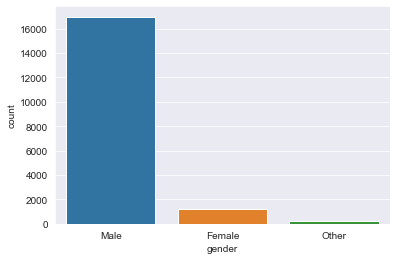

In [29]:
sns.countplot(train["gender"])
plt.savefig("hr-gender.png")

In [21]:
train["gender"].value_counts(normalize=True)

Male      0.903443
Female    0.083304
Other     0.013253
Name: gender, dtype: float64

In [ ]:
# Imputing mode 

In [41]:
train["gender"]=train["gender"].fillna(train["gender"].value_counts().sort_values(ascending=False).index[0])

In [ ]:
# enrolled_university

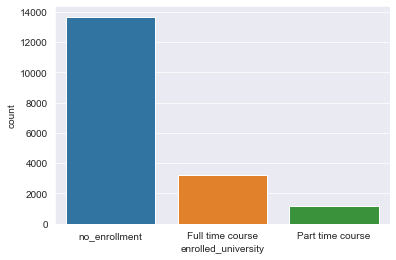

In [31]:
sns.countplot(train["enrolled_university"])
plt.savefig("hr-enrolled_university.png")

In [ ]:
# Imputing mode inplace of nan

In [42]:
train["enrolled_university"]=train["enrolled_university"].fillna(train["enrolled_university"].value_counts().sort_values(ascending=False).index[0])

In [ ]:
# education_level

In [35]:
train["education_level"].value_counts()

Graduate          10769
Masters            4319
High School        2032
Phd                 459
Primary School      323
Name: education_level, dtype: int64

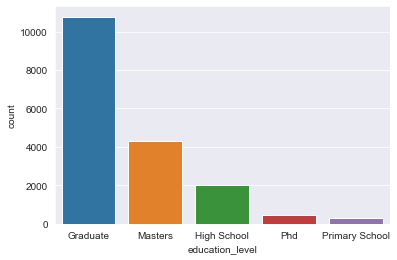

In [37]:
sns.countplot(train["education_level"])
plt.savefig("hr-edulevel.png")

In [43]:
train["education_level"]=train["education_level"].fillna(train["education_level"].value_counts().sort_values(ascending=False).index[0])

In [ ]:
# major_discipline

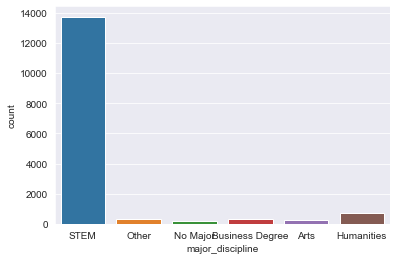

In [40]:
sns.countplot(train["major_discipline"])
plt.savefig("hr-discipline.png")

In [44]:
train["major_discipline"]=train["major_discipline"].fillna(train["major_discipline"].value_counts().sort_values(ascending=False).index[0])

In [ ]:
# experience

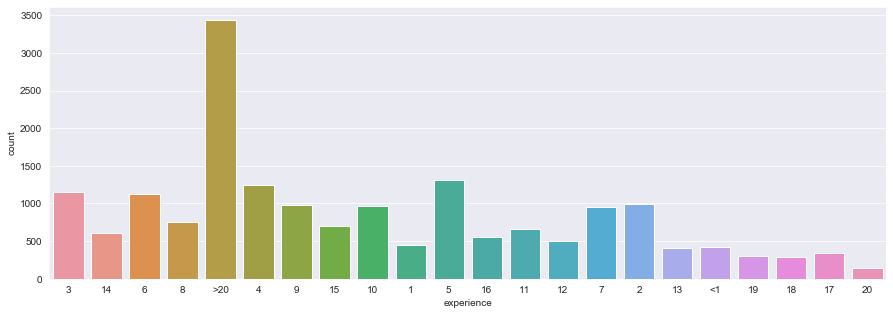

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(train["experience"])
plt.savefig("hr-exp.png")

In [45]:
train["experience"]=train["experience"].fillna(train["experience"].value_counts().sort_values(ascending=False).index[0])

In [ ]:
# company_size

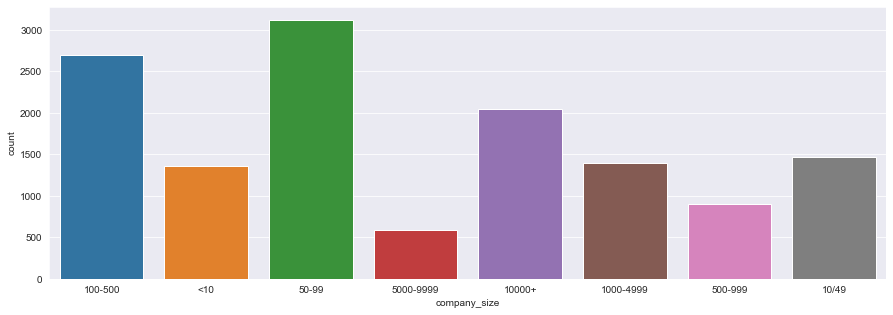

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(train["company_size"])
plt.savefig("hr-cosize.png")

In [46]:
train["company_size"]=train["company_size"].fillna(train["company_size"].value_counts().sort_values(ascending=False).index[0])

In [ ]:
# company_type

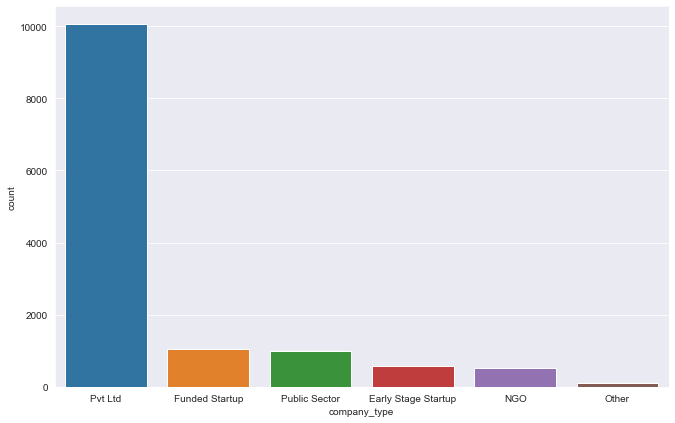

In [55]:
plt.figure(figsize=(11,7))
sns.countplot(train["company_type"])
plt.savefig("hr-cotype.png")

In [47]:
train["company_type"]=train["company_type"].fillna(train["company_type"].value_counts().sort_values(ascending=False).index[0])

In [ ]:
# last_new_job

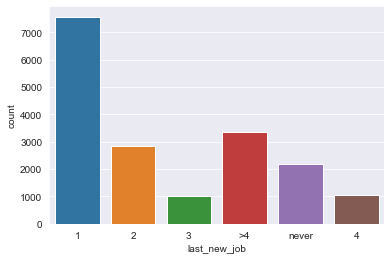

In [57]:
sns.countplot(train["last_new_job"])

In [48]:
train["last_new_job"]=train["last_new_job"].fillna(train["last_new_job"].value_counts().sort_values(ascending=False).index[0])

In [ ]:
# Till here we have seen the count of categorical variables and also imputted mode. So we have clean data with no null values

In [ ]:
# Now we have to convert our categorical col into numeric

In [49]:
train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
# City

In [18]:
train.city.head(2)

0    city_149
1     city_83
Name: city, dtype: object

In [ ]:
# we can see city are already coded in some form and also it can be said as nominal variable

In [50]:
le=LabelEncoder()
train["city"]=le.fit_transform(train["city"])

In [ ]:
# Gender: ordinal variable

In [51]:
gender=pd.get_dummies(train["gender"],drop_first=True,prefix="gender")

In [52]:
train=pd.concat([train,gender],axis=1)

In [53]:
del train["gender"]

In [ ]:
# relevent_experience: nominal

In [30]:
train["relevent_experience"].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [54]:
relevent_experience=pd.get_dummies(train["relevent_experience"],drop_first=True,prefix="exp")

In [55]:
train=pd.concat([train,relevent_experience],axis=1)

In [56]:
del train["relevent_experience"]

In [ ]:
# enrolled_university: ordinal

In [37]:
train["enrolled_university"].unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [57]:
enrolled = {"no_enrollment": 0, "Part time course": 1, "Full time course":2}
train['enrolled_university'] = train['enrolled_university'].map(enrolled)

In [58]:
# education_level: ordinal

In [39]:
train["education_level"].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [59]:
edu = {"Primary School": 0, "High School": 1, "Graduate":2,"Masters":3, "Phd":4}
train['education_level'] = train['education_level'].map(edu)

In [ ]:
# major_discipline: nominal

In [41]:
train["major_discipline"].unique()

array(['STEM', 'Other', 'No Major', 'Business Degree', 'Arts',
       'Humanities'], dtype=object)

In [60]:
major_discipline=pd.get_dummies(train["major_discipline"],drop_first=True,prefix="disc")

In [61]:
train=pd.concat([train,major_discipline],axis=1)

In [62]:
del train["major_discipline"]

In [ ]:
# experience: ordinal

In [48]:
train["experience"].unique()

array(['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '<1', '19', '18', '17', '20'],
      dtype=object)

In [63]:
exp = {"<1": 0, "1":1,"2": 2, "3":3,"4":4, "5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"11":10,"12":12,"13":13,"14":14,"15":15,"16":16,"17":17,"18":18,"19":19,"20":20,">20":21}
train['experience'] = train['experience'].map(exp)

In [ ]:
# company_size:ordinal

In [50]:
train["company_size"].unique()

array(['100-500', '<10', '50-99', '5000-9999', '10000+', '1000-4999',
       '500-999', '10/49'], dtype=object)

In [64]:
size = {"<10": 0, "10/49": 1, "50-99":2,"100-500":3, "500-999":4,"1000-4999":5,"5000-9999":6,"10000+":7}
train['company_size'] = train['company_size'].map(size)

In [ ]:
# company_type: nominal

In [52]:
train["company_type"].unique()

array(['Pvt Ltd', 'Funded Startup', 'Public Sector',
       'Early Stage Startup', 'NGO', 'Other'], dtype=object)

In [65]:
company_type=pd.get_dummies(train["company_type"],drop_first=True,prefix="type")

In [66]:
train=pd.concat([train,company_type],axis=1)

In [67]:
del train["company_type"]

In [ ]:
# last_new_job: nominal

In [58]:
train["last_new_job"].unique()

array(['1', '2', '3', '>4', 'never', '4'], dtype=object)

In [68]:
last_new_job=pd.get_dummies(train["last_new_job"],drop_first=True,prefix="job")

In [69]:
train=pd.concat([train,last_new_job],axis=1)

In [70]:
del train["last_new_job"]

In [ ]:
# Till now we have processed training dataset, lets have a look to the datatset

In [109]:
train.head(3)

,enrollee_id,city,city_development_index,enrolled_university,education_level,experience,company_size,training_hours,target,Male,...,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,job_2,job_3,job_4,job_>4,job_never
0,23798,41,0.689,0,2,2.0,3,106,0,1,...,0,0,0,0,1,0,0,0,0,0
1,29166,112,0.923,0,2,13.0,0,69,0,1,...,1,0,0,0,0,0,0,0,0,0
2,46,48,0.910,0,2,5.0,2,4,0,1,...,0,0,0,1,0,1,0,0,0,0


In [71]:
train.isna().sum()

enrollee_id                   0
city                          0
city_development_index        0
enrolled_university           0
education_level               0
experience                    0
company_size                  0
training_hours                0
target                        0
gender_Male                   0
gender_Other                  0
exp_No relevent experience    0
disc_Business Degree          0
disc_Humanities               0
disc_No Major                 0
disc_Other                    0
disc_STEM                     0
type_Funded Startup           0
type_NGO                      0
type_Other                    0
type_Public Sector            0
type_Pvt Ltd                  0
job_2                         0
job_3                         0
job_4                         0
job_>4                        0
job_never                     0
dtype: int64

In [ ]:
# Lets process test dataset in the same manner

In [ ]:
# Imputing mode for categorical variables

In [72]:
test["gender"]=test["gender"].fillna(test["gender"].value_counts().sort_values(ascending=False).index[0])
test["enrolled_university"]=test["enrolled_university"].fillna(test["enrolled_university"].value_counts().sort_values(ascending=False).index[0])
test["education_level"]=test["education_level"].fillna(test["education_level"].value_counts().sort_values(ascending=False).index[0])
test["major_discipline"]=test["major_discipline"].fillna(test["major_discipline"].value_counts().sort_values(ascending=False).index[0])
test["experience"]=test["experience"].fillna(test["experience"].value_counts().sort_values(ascending=False).index[0])
test["company_size"]=test["company_size"].fillna(test["company_size"].value_counts().sort_values(ascending=False).index[0])
test["company_type"]=test["company_type"].fillna(test["company_type"].value_counts().sort_values(ascending=False).index[0])
test["last_new_job"]=test["last_new_job"].fillna(test["last_new_job"].value_counts().sort_values(ascending=False).index[0])

In [ ]:
# Processing data

In [73]:
le=LabelEncoder()
test["city"]=le.fit_transform(test["city"])
gender=pd.get_dummies(test["gender"],drop_first=True,prefix="gender")
test=pd.concat([test,gender],axis=1)
del test["gender"]
relevent_experience=pd.get_dummies(test["relevent_experience"],drop_first=True,prefix="exp")
test=pd.concat([test,relevent_experience],axis=1)
del test["relevent_experience"]
enrolled = {"no_enrollment": 0, "Part time course": 1, "Full time course":2}
test['enrolled_university'] = test['enrolled_university'].map(enrolled)
edu = {"Primary School": 0, "High School": 1, "Graduate":2,"Masters":3, "Phd":4}
test['education_level'] = test['education_level'].map(edu)
major_discipline=pd.get_dummies(test["major_discipline"],drop_first=True,prefix="disc")
test=pd.concat([test,major_discipline],axis=1)
del test["major_discipline"]
exp = {"<1": 0, "1":1,"2": 2, "3":3,"4":4, "5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"11":10,"12":12,"13":13,"14":14,"15":15,"16":16,"17":17,"18":18,"19":19,"20":20,">20":21}
test['experience'] = test['experience'].map(exp)
size = {"<10": 0, "10/49": 1, "50-99":2,"100-500":3, "500-999":4,"1000-4999":5,"5000-9999":6,"10000+":7}
test['company_size'] = test['company_size'].map(size)
company_type=pd.get_dummies(test["company_type"],drop_first=True,prefix="type")
test=pd.concat([test,company_type],axis=1)
del test["company_type"]
last_new_job=pd.get_dummies(test["last_new_job"],drop_first=True,prefix="job")
test=pd.concat([test,last_new_job],axis=1)
del test["last_new_job"]

In [ ]:
# Lets see test dataset

In [74]:
test.isna().sum()

enrollee_id                   0
city                          0
city_development_index        0
enrolled_university           0
education_level               0
experience                    0
company_size                  0
training_hours                0
gender_Male                   0
gender_Other                  0
exp_No relevent experience    0
disc_Business Degree          0
disc_Humanities               0
disc_No Major                 0
disc_Other                    0
disc_STEM                     0
type_Funded Startup           0
type_NGO                      0
type_Other                    0
type_Public Sector            0
type_Pvt Ltd                  0
job_2                         0
job_3                         0
job_4                         0
job_>4                        0
job_never                     0
dtype: int64

In [112]:
test.head(3)

,enrollee_id,city,city_development_index,enrolled_university,education_level,experience,company_size,training_hours,Male,Other,...,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,job_2,job_3,job_4,job_>4,job_never
0,16548,73,0.448,2,2,0.0,5,15,1,0,...,0,0,0,1,0,0,0,0,0,0
1,12036,70,0.939,0,2,20.0,2,94,1,0,...,0,0,0,0,1,0,0,0,0,0
2,11061,5,0.920,2,2,2.0,2,17,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Dropping emp id as it serves no purpose in predicting

In [75]:
del train["enrollee_id"]
del test["enrollee_id"]

In [ ]:
# Lets split training dataset into dependent and independent dataset

In [76]:
y=train["target"]
x=train.drop("target",axis=1)

In [ ]:
# splitting the dataset using train test split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
# Printing the shape of splitted dataset

In [78]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (12851, 25)
shape of y_train: (12851,)
shape of x_test: (5508, 25)
shape of y_test: (5508,)


In [ ]:
# Applying machine learning algorithm on train dataset

In [ ]:
# Extra trees classifier

In [79]:
etc=ExtraTreesClassifier(n_estimators=100)
etc.fit(x_train,y_train)
prediction=etc.predict(x_test)

In [80]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.8413217138707335
Kappa is : 0.03977193847508975
Sensitiviy is : 0.06200527704485488
Precision is : 0.22380952380952382
R2 score is: -0.33703430079155683
Area under curve is  :0.5138447437855854
[[4587  163]
 [ 711   47]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      4750
           1       0.22      0.06      0.10       758

    accuracy                           0.84      5508
   macro avg       0.54      0.51      0.51      5508
weighted avg       0.78      0.84      0.80      5508



In [ ]:
# Bagging classifier

In [81]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
prediction=bc.predict(x_test)

In [82]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.8418663761801016
Kappa is : 0.03150012597143359
Sensitiviy is : 0.05408970976253298
Precision is : 0.21025641025641026
R2 score is: -0.33244493820302745
Area under curve is  :0.5108343285654771
[[4596  154]
 [ 717   41]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      4750
           1       0.21      0.05      0.09       758

    accuracy                           0.84      5508
   macro avg       0.54      0.51      0.50      5508
weighted avg       0.77      0.84      0.80      5508



In [ ]:
# KNN

In [83]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [84]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.8462236746550472
Kappa is : 0.01533579178781641
Sensitiviy is : 0.03430079155672823
Precision is : 0.18439716312056736
R2 score is: -0.29573003749479243
Area under curve is  :0.5050451326204694
[[4635  115]
 [ 732   26]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      4750
           1       0.18      0.03      0.06       758

    accuracy                           0.85      5508
   macro avg       0.52      0.51      0.49      5508
weighted avg       0.77      0.85      0.80      5508



In [ ]:
# Random forest

In [85]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

In [86]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.8554829339143064
Kappa is : 0.031370019176556796
Sensitiviy is : 0.032981530343007916
Precision is : 0.2840909090909091
R2 score is: -0.217710873489793
Area under curve is  :0.5098591862241355
[[4687   63]
 [ 733   25]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4750
           1       0.28      0.03      0.06       758

    accuracy                           0.86      5508
   macro avg       0.57      0.51      0.49      5508
weighted avg       0.78      0.86      0.80      5508



In [ ]:
# Decision tree

In [87]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=20)
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [88]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.8062817719680465
Kappa is : 0.05071665042810358
Sensitiviy is : 0.12928759894459102
Precision is : 0.19405940594059407
R2 score is: -0.6322832939869463
Area under curve is  :0.5218016942091377
[[4343  407]
 [ 660   98]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4750
           1       0.19      0.13      0.16       758

    accuracy                           0.81      5508
   macro avg       0.53      0.52      0.52      5508
weighted avg       0.78      0.81      0.79      5508



In [90]:
import catboost as cb

In [91]:
cat_rg1 = cb.CatBoostClassifier()
cat_rg1.fit(x_train,y_train)
prediction=cat_rg1.predict(x_test)

Learning rate set to 0.030651
0:	learn: 0.6716005	total: 251ms	remaining: 4m 10s
1:	learn: 0.6506742	total: 271ms	remaining: 2m 15s
2:	learn: 0.6312110	total: 292ms	remaining: 1m 37s
3:	learn: 0.6131207	total: 308ms	remaining: 1m 16s
4:	learn: 0.5965853	total: 328ms	remaining: 1m 5s
5:	learn: 0.5812840	total: 348ms	remaining: 57.6s
6:	learn: 0.5668086	total: 365ms	remaining: 51.8s
7:	learn: 0.5534360	total: 386ms	remaining: 47.8s
8:	learn: 0.5412862	total: 400ms	remaining: 44s
9:	learn: 0.5301013	total: 419ms	remaining: 41.5s
10:	learn: 0.5194291	total: 437ms	remaining: 39.3s
11:	learn: 0.5091748	total: 451ms	remaining: 37.2s
12:	learn: 0.4997885	total: 463ms	remaining: 35.1s
13:	learn: 0.4915654	total: 469ms	remaining: 33s
14:	learn: 0.4833456	total: 479ms	remaining: 31.4s
15:	learn: 0.4758713	total: 498ms	remaining: 30.6s
16:	learn: 0.4690289	total: 516ms	remaining: 29.8s
17:	learn: 0.4629474	total: 541ms	remaining: 29.5s
18:	learn: 0.4572027	total: 558ms	remaining: 28.8s
19:	learn: 

161:	learn: 0.3567998	total: 2.97s	remaining: 15.4s
162:	learn: 0.3567113	total: 2.98s	remaining: 15.3s
163:	learn: 0.3566460	total: 2.99s	remaining: 15.3s
164:	learn: 0.3565478	total: 3.02s	remaining: 15.3s
165:	learn: 0.3564894	total: 3.03s	remaining: 15.2s
166:	learn: 0.3564469	total: 3.05s	remaining: 15.2s
167:	learn: 0.3563081	total: 3.07s	remaining: 15.2s
168:	learn: 0.3561829	total: 3.09s	remaining: 15.2s
169:	learn: 0.3560540	total: 3.11s	remaining: 15.2s
170:	learn: 0.3559166	total: 3.13s	remaining: 15.2s
171:	learn: 0.3558467	total: 3.16s	remaining: 15.2s
172:	learn: 0.3557396	total: 3.18s	remaining: 15.2s
173:	learn: 0.3556286	total: 3.2s	remaining: 15.2s
174:	learn: 0.3555348	total: 3.21s	remaining: 15.1s
175:	learn: 0.3554200	total: 3.23s	remaining: 15.1s
176:	learn: 0.3553135	total: 3.25s	remaining: 15.1s
177:	learn: 0.3551937	total: 3.27s	remaining: 15.1s
178:	learn: 0.3550718	total: 3.29s	remaining: 15.1s
179:	learn: 0.3549855	total: 3.31s	remaining: 15.1s
180:	learn: 0

328:	learn: 0.3407754	total: 6.13s	remaining: 12.5s
329:	learn: 0.3406906	total: 6.14s	remaining: 12.5s
330:	learn: 0.3406002	total: 6.16s	remaining: 12.4s
331:	learn: 0.3405349	total: 6.17s	remaining: 12.4s
332:	learn: 0.3404188	total: 6.19s	remaining: 12.4s
333:	learn: 0.3403598	total: 6.21s	remaining: 12.4s
334:	learn: 0.3402864	total: 6.23s	remaining: 12.4s
335:	learn: 0.3401794	total: 6.25s	remaining: 12.4s
336:	learn: 0.3400852	total: 6.27s	remaining: 12.3s
337:	learn: 0.3399866	total: 6.29s	remaining: 12.3s
338:	learn: 0.3398914	total: 6.31s	remaining: 12.3s
339:	learn: 0.3397731	total: 6.32s	remaining: 12.3s
340:	learn: 0.3396542	total: 6.34s	remaining: 12.3s
341:	learn: 0.3395245	total: 6.36s	remaining: 12.2s
342:	learn: 0.3394371	total: 6.38s	remaining: 12.2s
343:	learn: 0.3393486	total: 6.4s	remaining: 12.2s
344:	learn: 0.3392856	total: 6.42s	remaining: 12.2s
345:	learn: 0.3392189	total: 6.43s	remaining: 12.2s
346:	learn: 0.3391584	total: 6.45s	remaining: 12.1s
347:	learn: 0

487:	learn: 0.3264663	total: 8.91s	remaining: 9.35s
488:	learn: 0.3263773	total: 8.92s	remaining: 9.33s
489:	learn: 0.3263153	total: 8.94s	remaining: 9.3s
490:	learn: 0.3262486	total: 8.96s	remaining: 9.29s
491:	learn: 0.3261741	total: 8.97s	remaining: 9.27s
492:	learn: 0.3260788	total: 8.99s	remaining: 9.25s
493:	learn: 0.3259854	total: 9.01s	remaining: 9.23s
494:	learn: 0.3258692	total: 9.03s	remaining: 9.21s
495:	learn: 0.3257867	total: 9.05s	remaining: 9.19s
496:	learn: 0.3256399	total: 9.07s	remaining: 9.18s
497:	learn: 0.3255766	total: 9.09s	remaining: 9.16s
498:	learn: 0.3254450	total: 9.1s	remaining: 9.13s
499:	learn: 0.3253441	total: 9.12s	remaining: 9.12s
500:	learn: 0.3252857	total: 9.13s	remaining: 9.1s
501:	learn: 0.3252034	total: 9.15s	remaining: 9.08s
502:	learn: 0.3250810	total: 9.17s	remaining: 9.06s
503:	learn: 0.3249870	total: 9.18s	remaining: 9.03s
504:	learn: 0.3249032	total: 9.2s	remaining: 9.01s
505:	learn: 0.3248386	total: 9.21s	remaining: 8.99s
506:	learn: 0.32

655:	learn: 0.3130575	total: 11.8s	remaining: 6.2s
656:	learn: 0.3130106	total: 11.8s	remaining: 6.17s
657:	learn: 0.3129242	total: 11.8s	remaining: 6.15s
658:	learn: 0.3128564	total: 11.9s	remaining: 6.13s
659:	learn: 0.3127817	total: 11.9s	remaining: 6.12s
660:	learn: 0.3127348	total: 11.9s	remaining: 6.1s
661:	learn: 0.3126788	total: 11.9s	remaining: 6.08s
662:	learn: 0.3126078	total: 11.9s	remaining: 6.06s
663:	learn: 0.3125525	total: 11.9s	remaining: 6.05s
664:	learn: 0.3124887	total: 12s	remaining: 6.03s
665:	learn: 0.3124101	total: 12s	remaining: 6.01s
666:	learn: 0.3123516	total: 12s	remaining: 5.99s
667:	learn: 0.3123022	total: 12s	remaining: 5.97s
668:	learn: 0.3122449	total: 12s	remaining: 5.95s
669:	learn: 0.3121741	total: 12s	remaining: 5.93s
670:	learn: 0.3120647	total: 12.1s	remaining: 5.91s
671:	learn: 0.3119740	total: 12.1s	remaining: 5.89s
672:	learn: 0.3118992	total: 12.1s	remaining: 5.87s
673:	learn: 0.3118223	total: 12.1s	remaining: 5.86s
674:	learn: 0.3117402	tota

815:	learn: 0.3025058	total: 14.6s	remaining: 3.28s
816:	learn: 0.3024520	total: 14.6s	remaining: 3.27s
817:	learn: 0.3023526	total: 14.6s	remaining: 3.25s
818:	learn: 0.3023109	total: 14.6s	remaining: 3.23s
819:	learn: 0.3022148	total: 14.6s	remaining: 3.21s
820:	learn: 0.3021629	total: 14.7s	remaining: 3.19s
821:	learn: 0.3020952	total: 14.7s	remaining: 3.18s
822:	learn: 0.3020296	total: 14.7s	remaining: 3.16s
823:	learn: 0.3019781	total: 14.7s	remaining: 3.14s
824:	learn: 0.3018931	total: 14.7s	remaining: 3.12s
825:	learn: 0.3018295	total: 14.7s	remaining: 3.1s
826:	learn: 0.3017405	total: 14.8s	remaining: 3.09s
827:	learn: 0.3017079	total: 14.8s	remaining: 3.07s
828:	learn: 0.3016562	total: 14.8s	remaining: 3.05s
829:	learn: 0.3015887	total: 14.8s	remaining: 3.03s
830:	learn: 0.3015408	total: 14.8s	remaining: 3.02s
831:	learn: 0.3014774	total: 14.8s	remaining: 3s
832:	learn: 0.3014465	total: 14.9s	remaining: 2.98s
833:	learn: 0.3013818	total: 14.9s	remaining: 2.96s
834:	learn: 0.30

983:	learn: 0.2930716	total: 17.5s	remaining: 284ms
984:	learn: 0.2930143	total: 17.5s	remaining: 267ms
985:	learn: 0.2929505	total: 17.5s	remaining: 249ms
986:	learn: 0.2928854	total: 17.5s	remaining: 231ms
987:	learn: 0.2928603	total: 17.6s	remaining: 213ms
988:	learn: 0.2927829	total: 17.6s	remaining: 195ms
989:	learn: 0.2927031	total: 17.6s	remaining: 178ms
990:	learn: 0.2926221	total: 17.6s	remaining: 160ms
991:	learn: 0.2925661	total: 17.6s	remaining: 142ms
992:	learn: 0.2924815	total: 17.6s	remaining: 124ms
993:	learn: 0.2924173	total: 17.7s	remaining: 107ms
994:	learn: 0.2923490	total: 17.7s	remaining: 88.9ms
995:	learn: 0.2922657	total: 17.7s	remaining: 71.1ms
996:	learn: 0.2921870	total: 17.7s	remaining: 53.3ms
997:	learn: 0.2921414	total: 17.7s	remaining: 35.5ms
998:	learn: 0.2921413	total: 17.7s	remaining: 17.8ms
999:	learn: 0.2920823	total: 17.7s	remaining: 0us


In [92]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.8609295570079883
Kappa is : 0.012115558602552201
Sensitiviy is : 0.010554089709762533
Precision is : 0.3333333333333333
R2 score is: -0.17181724760449946
Area under curve is  :0.5035928343285654
[[4734   16]
 [ 750    8]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      4750
           1       0.33      0.01      0.02       758

    accuracy                           0.86      5508
   macro avg       0.60      0.50      0.47      5508
weighted avg       0.79      0.86      0.80      5508



In [ ]:
# xgboostclassifier

In [93]:
xgb=XGBClassifier()
prediction= xgb.fit(x_train,y_train).predict(x_test)

In [94]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.853122730573711
Kappa is : 0.028404095729835377
Sensitiviy is : 0.03430079155672823
Precision is : 0.2524271844660194
R2 score is: -0.23759811137342046
Area under curve is  :0.5090451326204694
[[4673   77]
 [ 732   26]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      4750
           1       0.25      0.03      0.06       758

    accuracy                           0.85      5508
   macro avg       0.56      0.51      0.49      5508
weighted avg       0.78      0.85      0.80      5508



In [ ]:
# Applying best model on test dataset as per auc

In [245]:
rf=RandomForestClassifier(criterion="entropy",max_depth=20)
rf.fit(x,y)
prediction=rf.predict(test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
# Preparing prediction dataset as per submision file 

In [248]:
final_prediction=pd.DataFrame({"enrollee_id":b["enrollee_id"],"target":prediction})

In [ ]:
# lets see our final prediction dataset

In [249]:
final_prediction.head(4)

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,0
3,5032,0


In [250]:
# convert to csv
final_prediction.to_csv("Hr1.csv",index=False)

In [ ]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#%matplotlib inline 
import os
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


#read data
#os.chdir("C:/Users/pulkit_mehta/Downloads")
train = pd.read_csv('../input/av-hr-08may2020/train_jqd04QH.csv')
test = pd.read_csv('../input/av-hr-08may2020/test_KaymcHn.csv')
sub = pd.read_csv('../input/av-hr-08may2020/sample_submission_sxfcbdx.csv')


# replacing missing data by mode
for column in ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience','company_size',
              'company_type','last_new_job']:
    train[column].fillna(train[column].mode()[0], inplace=True)
    test[column].fillna(test[column].mode()[0], inplace=True)

	
#prepare features , target	
train_x = train.drop(columns=['target','enrollee_id'],axis=1)
train_y = train['target']

test = test.drop(columns='enrollee_id',axis=1)

#specifying categorical variables indexes
categorical_var = np.array([ 0, 2, 3,  4,  5,  6, 7,   8,  9, 10])

#fitting catboost classifier model
model = CatBoostClassifier(n_estimators=100
                          )
model.fit(train_x,train_y,cat_features=categorical_var,verbose=True)

#predict probability on test data
predict_test = model.predict_proba(test)[:,1]

sub.target = predict_test
sub.to_csv('cb_100.csv',index = False)